# <center> <h1> Modélisation linéaire </h1> </center>

<img src="../images/example.png" width="200">

## Le problème

Les modèles linéaires sont intéressants en raison de leur interprétabilité. Ils donnent une approximation de phénomènes que l'on tente de comprendre.

Lorsque l'on cherche à comprendre des phénomènes et déterminer des mécanismes explicatifs d'une variable de sortie, il peut être utile de réaliser une modélisation, notamment linéaire.

Pour chaque individu i (un individu correspond à une ligne) d'une base de données on a des informations $x^i_1, x^i_2,..., x^i_n$ et une valeur réelle $y^i$ que l'on cherche à approximer. 

On cherche un modèle permettant d'approximer une variable (output) $y^i$, grâce à les variables explicatives (features/input) $x^i_1, x^i_2,..., x^i_n$ par l'équation suivante :
$$\hat{y}^i = \alpha_1x^i_1 + \alpha_2x^i_2 + ... + \alpha_nx^i_n$$

Avec : 
- i : un individu i d'une base de données
- $\hat{y}^i$ l'approximation de $\hat{y}$
- $\alpha_1, \alpha_2,..., \alpha_n$ des coefficients réels

# Exemples d'application

Lorsque l'on veut étudier l'effet d'une variable sur une autre il peut être intéressant d'avoir un modèle général d'explication de l'output pour estimer quelle influence va avoir la variable explicative d'intérêt tout en prenant en compte les autres facteurs explicatifs.

Imports

In [2]:
get_ipython().magic(u'matplotlib inline')
%run -i ../utils/credentials.py
%run -i ../utils/imports.py
%run -i ../utils/plots.py
%run -i ../utils/stats.py

import numpy as np

Data

In [3]:
data_path = "../data/PUBG_train_sample.csv"
data_PUBG = pd.read_csv(data_path)
data_PUBG = data_PUBG.sample(frac=0.01, replace=False, random_state=1234)
data_PUBG_not_zero = data_PUBG[(data_PUBG["winPoints"]!=0)&(data_PUBG["killPoints"]!=0)]

## I. Les moindres carrés ordinaires

Avec les moindres carrés on tente de réaliser la meilleure approximation en choisissant des coefficient $\hat{\alpha_1}, \hat{\alpha_2},..., \hat{\alpha_n}$ qui vont minismiser l'erreur quadratique moyenne : 
$$\frac{1}{n}\sum_i(y^i-\hat{y}^i)^2$$

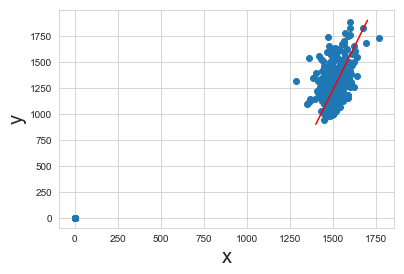

In [4]:
plt.scatter(data_PUBG["winPoints"], data_PUBG["killPoints"])
plt.xlabel("x", fontsize = 20)
plt.ylabel("y", fontsize = 20)
plt.plot((1400,1700),(900,1900), c="r")

La solution des moindres carré existe et elle est analytique. Sous les hypothèses de Gauss-Markov elle a également la propriété d'être sans biais. Cela signifie que notre estimateur de $\hat{\alpha}$ vaut bien $\alpha$ en moyenne.
Ces conditions sont les suivantes : 


#### Hypothèses de Gauss-Markov.
- Non colinéarité des variables explicatives : les variables explicatives ne sont pas des combinaisons linéaires des autres
- Indépendance des erreurs : la valeur d'une erreur de dépend pas de celle d'une autre (ce qui est souvent faut pour les séries temporelles
- Exogénéité : les variables sont indépendantes du terme d'erreur
- Homoscédasticité : la variance des termes d'erreur est constante 
- Normalité des termes d'erreur : la distribution des termes d'erreur suit une loi normale

# 2. Intérprétation du modèle

__Les coefficient__
Chaque coefficient $\alpha_i$ donne l'effet de la variable $x_i$ sur l'output. Si $x_1$ augmente de 1 alors la variable $y$ augmente de $\alpha_i$.

__La qualité du modèle__
Pour savoir si un modèle linéaire est bon, plusieurs points peuvent être vérifiés :
- les hypothèses sont-elles respectées ?
- l'ajustement est-il correct ?

Pour répondre à la deuxième question on peut calculer la part de la variance (en d'autres termes un indicateur de la variation) de y

##### Imports

In [5]:
x = data_PUBG["winPoints"]
y = data_PUBG["killPoints"]
slope, intercept, r_value, p_value, std_err = scs.linregress(x, y)

print(intercept)
print(slope)

-0.69955334723943
0.825000858701489


In [24]:
import statsmodels.api as sm
x = data_PUBG["winPoints"]
x = sm.add_constant(x)
y = data_PUBG["killPoints"]

MCO_model = sm.GLM(y, x)
MCO_model = MCO_model.fit()

In [26]:
MCO_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             killPoints   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          14006.
Method:                          IRLS   Log-Likelihood:                -6191.6
Date:                Wed, 06 Nov 2019   Deviance:                   1.3978e+07
Time:                        19:10:41   Pearson chi2:                 1.40e+07
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6996      4.946     -0.141      0.888     -10.394       8.995
winPoints      0.8250      0.005    164.375      0.000       0.815       0.835
==============================================================================
"""

In [8]:
MCO_results.params

const       -0.699553
winPoints    0.825001
dtype: float64

In [9]:
MCO_results.pvalues

const        0.887532
winPoints    0.000000
dtype: float64

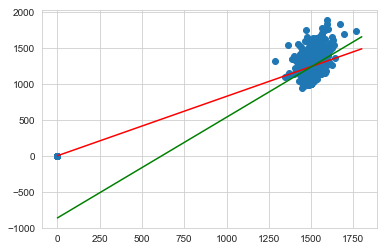

In [10]:
plt.scatter(data_PUBG["winPoints"], data_PUBG["killPoints"])

# With all the data
x = data_PUBG["winPoints"]
x = sm.add_constant(x)
y = data_PUBG["killPoints"]
MCO_model = sm.GLM(y, x)
MCO_results = MCO_model.fit()

# With only non zero value
x_not_zero = data_PUBG_not_zero["winPoints"]
x_not_zero = sm.add_constant(x_not_zero)
y_not_zero = data_PUBG_not_zero["killPoints"]
MCO_model_not_zero = sm.GLM(y_not_zero, x_not_zero)
MCO_results_not_zero = MCO_model_not_zero.fit()


x_plot = np.linspace(0,1800)
y_plot = MCO_results.params.const + MCO_results.params.winPoints*x_plot
plt.plot(x_plot, y_plot, c = "r")

x_plot_not_zero = np.linspace(0,1800)
y_plot_not_zero = MCO_results_not_zero.params.const + MCO_results_not_zero.params.winPoints*x_plot
plt.plot(x_plot_not_zero, y_plot_not_zero, c = "g")

In [11]:
len(data_PUBG) - len(data_PUBG_not_zero)

572

In [12]:
len(data_PUBG)

1000

In [13]:
MCO_results_not_zero.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             killPoints   No. Observations:                  428
Model:                            GLM   Df Residuals:                      426
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          32001.
Method:                          IRLS   Log-Likelihood:                -2826.2
Date:                Wed, 06 Nov 2019   Deviance:                   1.3633e+07
Time:                        19:07:32   Pearson chi2:                 1.36e+07
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -863.9953    262.757     -3.288      0.001   -1378.990    -349.001
winPoints      1.3978      0.174      8.014      0.000       1.056       1.740
==============================================================================
"""

In [14]:
# With only non zero value
x_not_zero = data_PUBG_not_zero["winPoints"]
x_not_zero = sm.add_constant(x_not_zero)
y_not_zero = data_PUBG_not_zero["killPoints"]
MCO_model_not_zero = sm.GLM(y_not_zero, x_not_zero)
MCO_results_not_zero = MCO_model_not_zero.fit()

# With only non zero value
x_not_zero_two_X = data_PUBG_not_zero[["winPoints","winPoints"]]
x_not_zero_two_X = sm.add_constant(x_not_zero_two_X)
MCO_model_not_zero_two_X = sm.GLM(y_not_zero, x_not_zero_two_X)
MCO_results_not_zero_two_X = MCO_model_not_zero_two_X.fit()

In [15]:
MCO_results_not_zero_two_X.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             killPoints   No. Observations:                  428
Model:                            GLM   Df Residuals:                      426
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          32001.
Method:                          IRLS   Log-Likelihood:                -2826.2
Date:                Wed, 06 Nov 2019   Deviance:                   1.3633e+07
Time:                        19:07:33   Pearson chi2:                 1.36e+07
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -863.9953    262.757     -3.288      0.001   -1378.990    -349.001
winPoints      0.6989      0.087      8.014      0.000       0.528       0.870
winPoints      0.6989      0.087      8.014      0.000       0.528       0.870
==============================================================================
"""

In [16]:
 MCO_results_not_zero.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             killPoints   No. Observations:                  428
Model:                            GLM   Df Residuals:                      426
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          32001.
Method:                          IRLS   Log-Likelihood:                -2826.2
Date:                Wed, 06 Nov 2019   Deviance:                   1.3633e+07
Time:                        19:07:33   Pearson chi2:                 1.36e+07
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -863.9953    262.757     -3.288      0.001   -1378.990    -349.001
winPoints      1.3978      0.174      8.014      0.000       1.056       1.740
==============================================================================
"""

# 3. Qualité des résultats

## 3.1 Le coefficient de détermination $R^2$

Le $R^2$ est une première mesure de qualité du modèle qui donne une bonne idée de la qualité de la régression.

Calcul du $R^2$ : 
$$R^2 = \frac{SSR}{SST}$$ 
- $SSR$ (regression sum of squares) $= \sum_i(\hat{y_i} - \bar{y})^2$
- $SST$ (total sum of squares) $= \sum_i(y_i - \bar{y})^2$

Intuitivement le coefficient de détermination donne le rapport de la variance expliquée par le modèle ($\frac{SSR}{n}$, variation de $\hat{y}$) sur la variance totale ($\frac{SST}{n}$, variation de $y$), c'est-à-dire la part de variance expliquée par le modèle.

In [36]:
def compute_R_square(y,y_hat):
    SSR = np.sum((y_hat - np.mean(y_hat))**2)
    SST = np.sum((y - np.mean(y_hat))**2)
    return SSR/SST

In [33]:
from sklearn.metrics import r2_score
r2_score(y, MCO_results.predict(x))

0.9643790495829452

In [37]:
compute_R_square(y, MCO_results.predict(x))

0.9643790495829442

In [45]:
compute_R_square(y_not_zero, MCO_results_not_zero.predict(x_not_zero))

0.13099831840193663

## 3.2 Le coefficient de détermination ajusté $\bar{R}^2$

$$\bar{R}^2= 1 - (1-R^2)\times \big(\frac{n-1}{n-p-1}\big)$$

Avec :
- $n$ : la taille de l'échantillon ($i \in [1,...,n]$)
- $p$ : le nombre de variables explicatives (hors cnostante)

In [40]:
def adjusted_R_square(y,y_hat, n, p):
    r2 = compute_R_square(y,y_hat)
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [41]:
adjusted_R_square(y,MCO_results.predict(x), 10, 1)

0.9599264307808122

<center> <h1>Take away</h1> </center>

<img src="../images/coffee.png" width="200">


__Expresso__ : 

* point 1
* point 2

__Sugar Story__ :

* point 1
* point 2

# Get more on my github <img src="../images/github.png" width="100">
https://github.com/JJublanc/statistics_tools